<a href="https://colab.research.google.com/github/Abhinav-Biswas/Coursera-Homework-Web-Intelligence-Big-Data/blob/master/CSIZG523_IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Name: Abhinav Biswas**
## **BITS ID: 2020HT66014**
## **Course No: CSIZG523 Introduction to Data Science**
**EC-1 Experiential Learning Assignment: Using Iris Species Dataset in the link https://www.kaggle.com/uciml/iris**


In [312]:
#  Begining with a check of the software.

# The version of python
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy 
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy 
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas 
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn 
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.19.5
matplotlib: 3.2.2
pandas: 1.1.5
sklearn: 0.22.2.post1


In [313]:
#  Loading the libraries

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

#  Enable inline plotting from matplotlib
%matplotlib inline

#  Set some styles for seaborn
sns.set(style="white", color_codes=True)

In [314]:
#  Loading the dataset into a pandas dataframe named 'iris'
iris = pandas.read_csv("Iris.csv", index_col=[0])

In [315]:
#  Checking the shape of the data.
#  Expect it to be 150 rows and 5 columns.
print(iris.shape)

(150, 5)


In [316]:
#  Print the first 20 data points -- the head of the dataset
print(iris.head(20))

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa
6             5.4           3.9            1.7           0.4  Iris-setosa
7             4.6           3.4            1.4           0.3  Iris-setosa
8             5.0           3.4            1.5           0.2  Iris-setosa
9             4.4           2.9            1.4           0.2  Iris-setosa
10            4.9           3.1            1.5           0.1  Iris-setosa
11            5.4           3.7            1.5           0.2  Iris-setosa
12            4.8           3.4       

In [317]:
#  Using the groupby method to determine the class distribution
print(iris.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# **1. a) Scatter plot for sepal (length and width)**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


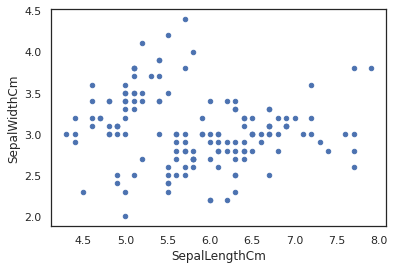

In [318]:
#  Using the .plot extension from Pandas dataframes to make a scatterplot of the Iris sepal features.
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

# **1. b) Scatter plot for petal (length and width)**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


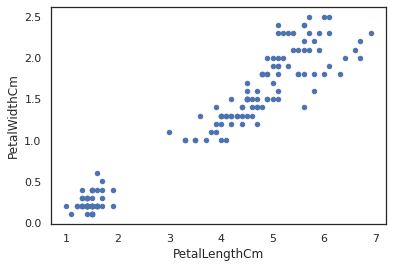

In [319]:
#  Using the .plot extension from Pandas dataframes to make a scatterplot of the Iris petal features.
iris.plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm")

**Scatter plot for sepal (length and width) by species**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


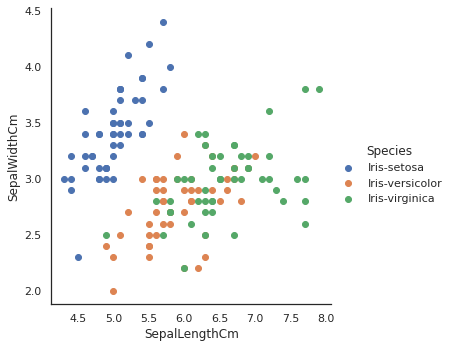

In [320]:
#  Using seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

**Scatter plot for petal (length and width) by species**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


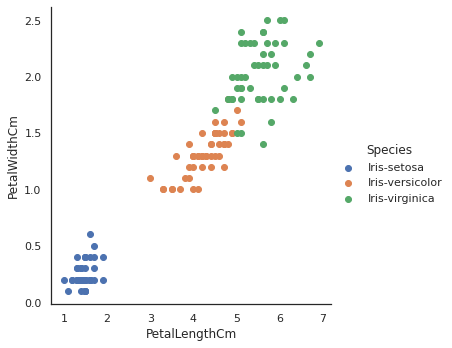

In [321]:
#  Using seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

# **2. Preparation for Development of Clssification Models**

In [322]:
#  Split the data into feature variables, X, and target variable, y
#  Feature variables are in the first four columns -- indexes 0,1,2,3
#  Target variable is in column 4

#  Note the use of upper case X and lower case y.
#  As per the convention used to distinguish between matrices, X, 
#  and vectors, y, as the expression describing the model is AX = y.

X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = iris.Species

#  Expect X to be 150 rows, 4 columns
print (type(X))
print ('Dimensions of X: ', X.shape)

#  We converted the labels to 0/1 integers in the cell above
#  Expect y to be 150 rows, 1 column
print (type(y))
print ('Dimensions of y: ', y.shape)

<class 'pandas.core.frame.DataFrame'>
Dimensions of X:  (150, 4)
<class 'pandas.core.series.Series'>
Dimensions of y:  (150,)


In [323]:
#  Split the data into training and test sets
#  Test data is 20% of the total number of rows -- 30 rows.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
print ('Dimensions of X_train: ', X_train.shape)
print ('Dimensions of X_test:  ', X_test.shape)
print ('Dimensions of y_train: ', y_train.shape)
print ('Dimensions of y_test:  ', y_test.shape)

Dimensions of X_train:  (120, 4)
Dimensions of X_test:   (30, 4)
Dimensions of y_train:  (120,)
Dimensions of y_test:   (30,)


# **2. a) Classification model using Decision Tree**

In [324]:
Model_DT = DecisionTreeClassifier(max_leaf_nodes=3)
Model_DT.fit(X_train, y_train)

y_pred_Model_DT = Model_DT.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_Model_DT))
print(confusion_matrix(y_test, y_pred_Model_DT))
# Accuracy score
accuracy_DT = accuracy_score(y_pred_Model_DT, y_test)
print('Accuracy is', accuracy_DT)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Accuracy is 0.9666666666666667


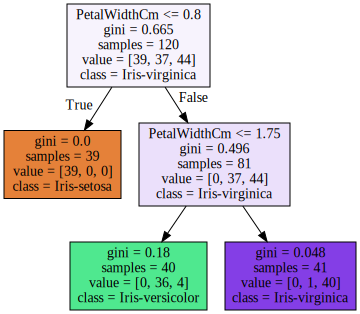

In [325]:
# Visualize the trained Decision Tree by export_graphviz() method

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(Model_DT ,feature_names = X.columns, class_names = y.unique(), filled = True))
display(SVG(graph.pipe(format='svg')))

# **2. b) Classification model using Logistic Regression**

In [326]:
Model_LR = LogisticRegression(C=0.1, max_iter=300)
Model_LR.fit(X_train, y_train)

y_pred_Model_LR = Model_LR.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_Model_LR))
print(confusion_matrix(y_test, y_pred_Model_LR))
# Accuracy score
accuracy_LR = accuracy_score(y_pred_Model_LR, y_test)
print('Accuracy is', accuracy_LR)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.75      1.00      0.86         6

       accuracy                           0.93        30
      macro avg       0.92      0.95      0.92        30
   weighted avg       0.95      0.93      0.94        30

[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]
Accuracy is 0.9333333333333333


# **2. c) Classification model using Random Forest**

In [327]:
Model_RF=RandomForestClassifier(max_depth=1, max_features=0.5, random_state=0)
Model_RF.fit(X_train,y_train)

y_pred_Model_RF=Model_RF.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred_Model_RF))
print(confusion_matrix(y_test, y_pred_Model_RF))
#Accuracy Score
accuracy_RF = accuracy_score(y_pred_Model_RF, y_test)
print('Accuracy is', accuracy_RF)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Accuracy is 0.9666666666666667


# **3. a) 10-Fold Cross Validation of each Classifier Model**

In [328]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
iris.Species = le.fit_transform(iris.Species)
le.transform(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

kfold = KFold(n_splits=10, shuffle=True)
print("Accuracy_DT: {}".format(cross_val_score(Model_DT, iris, iris.Species, cv=kfold)))
print("Accuracy_LR : {}".format(cross_val_score(Model_LR, iris, iris.Species, cv=kfold)))
print("Accuracy_RF : {}".format(cross_val_score(Model_RF, iris, iris.Species, cv=kfold)))

Accuracy_DT: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy_LR : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy_RF : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


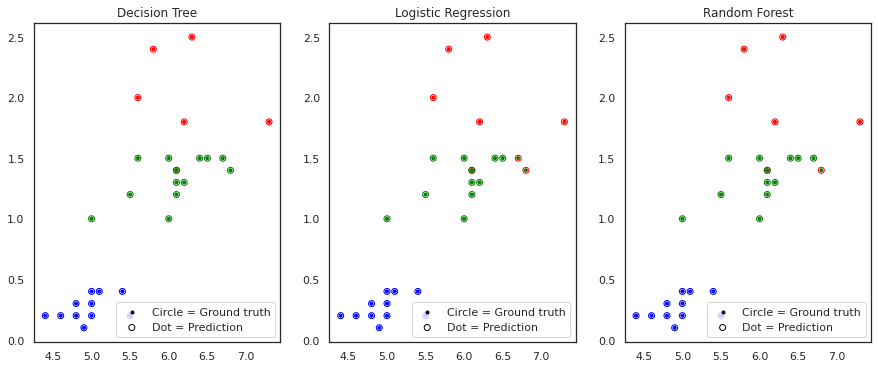

In [329]:
# Comparing the prediction result with ground truth
fig = plt.figure(figsize=(15,20))

def run_model(model, alg_name, plot_index):
    color_code = {'Iris-virginica':'red', 'Iris-setosa':'blue', 'Iris-versicolor':'green'}

    # plt.figure(plot_index)
    ax = fig.add_subplot(3,3,plot_index) 
    colors = [color_code[x] for x in y_test]
    ax.scatter(X_test.iloc[:,0], X_test.iloc[:,3], color=colors, marker='.', label='Circle = Ground truth')
    
    
    if plot_index == 1:
      colors = [color_code[x] for x in y_pred_Model_DT]
    elif plot_index == 2:
      colors = [color_code[x] for x in y_pred_Model_LR]
    else:
      colors = [color_code[x] for x in y_pred_Model_RF]    
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:,3], color=colors, marker='o', facecolors='none', label='Dot = Prediction')

    #plt.axes([0.65, 0.65, 0.2, 0.2])
    ax.legend(loc="lower right")
    # manually set legend color to black
    leg = plt.gca().get_legend()
    leg.legendHandles[0].set_color('black')
    leg.legendHandles[1].set_color('black')
    leg.legendHandles[1].set_facecolors('none')
    ax.set_title(alg_name)

run_model(Model_DT, "Decision Tree", 1)
run_model(Model_LR, "Logistic Regression", 2)
run_model(Model_RF, "Random Forest", 3)


# **3. b) Precision, Recall and F1-Score for each classifier**

In [330]:
# initialize list of lists for each classifier
data = {'Precision':[precision_score(y_test, y_pred_Model_DT, average='micro'), precision_score(y_test, y_pred_Model_LR, average='micro'), precision_score(y_test, y_pred_Model_RF, average='micro')],
        'Recall':[recall_score(y_test, y_pred_Model_DT, average='micro'), recall_score(y_test, y_pred_Model_LR, average='micro'), recall_score(y_test, y_pred_Model_RF, average='micro')],
        'F1-Score':[f1_score(y_test, y_pred_Model_DT, average='micro'), f1_score(y_test, y_pred_Model_LR, average='micro'), f1_score(y_test, y_pred_Model_RF, average='micro')]}

# Creates pandas DataFrame.
df = pandas.DataFrame(data, index =['Decision Tree', 'Logistic Regression', 'Random Forest'])

# Print DataFrame 
df.index.name = 'Classifier'
display(df)

,Precision,Recall,F1-Score
Classifier,,,
Decision Tree,0.966667,0.966667,0.966667
Logistic Regression,0.933333,0.933333,0.933333
Random Forest,0.966667,0.966667,0.966667
